In [1]:
from diffractio import degrees, eps, mm, no_date, np, plt, um
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY

### save_load

In [2]:
length = 100 * um
numdata = 16  # 256
x0 = np.linspace(-length / 2, length / 2, numdata)
y0 = np.linspace(-length / 2, length / 2, numdata)
z0 = np.linspace(-length / 2, length / 2, numdata)
wavelength = 0.5 * um
filename='save_load.npz'

t1 = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)

t1.u = np.ones_like(t1.u)
t1.save_data(filename=filename, method='savez_compressed', add_name='')

del t1

t2 = Scalar_field_XYZ(x=None, y=None, z=None, wavelength=None)
t2.load_data(
    filename=filename, method='savez_compressed', verbose=False);

{'x': array([-50.        , -43.33333333, -36.66666667, -30.        ,
       -23.33333333, -16.66666667, -10.        ,  -3.33333333,
         3.33333333,  10.        ,  16.66666667,  23.33333333,
        30.        ,  36.66666667,  43.33333333,  50.        ]), 'y': array([-50.        , -43.33333333, -36.66666667, -30.        ,
       -23.33333333, -16.66666667, -10.        ,  -3.33333333,
         3.33333333,  10.        ,  16.66666667,  23.33333333,
        30.        ,  36.66666667,  43.33333333,  50.        ]), 'z': array([-50.        , -43.33333333, -36.66666667, -30.        ,
       -23.33333333, -16.66666667, -10.        ,  -3.33333333,
         3.33333333,  10.        ,  16.66666667,  23.33333333,
        30.        ,  36.66666667,  43.33333333,  50.        ]), 'wavelength': 0.5, 'n_background': 1.0, 'fast': True, 'quality': 0, 'borders': None, 'X': array([[[-50.        , -50.        , -50.        , ..., -50.        ,
         -50.        , -50.        ],
        [-50.        , -

### clear_field

In [3]:
length = 100 * um
numdata = 32  # 256
x0 = np.linspace(-length / 2, length / 2, numdata)
y0 = np.linspace(-length / 2, length / 2, numdata)
z0 = np.linspace(-length / 2, length / 2, numdata)
wavelength = 0.5 * um

u0 = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)

proposal = 0 * u0.u

u0.clear_field()
solution = u0.u

### other

In [4]:
length = 100 * um
numdata = 32  # 256
x0 = np.linspace(-length / 2, length / 2, numdata)
y0 = np.linspace(-length / 2, length / 2, numdata)
wavelength = 0.5 * um

period = 10 * um
z_talbot = 2 * period**2 / wavelength

z0 = np.linspace(2 * z_talbot, 6 * z_talbot, 32)

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(A=1, r0=(0, 0), z0=0, w0=(150 * um, 150 * um))

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.ronchi_grating(period=10 * um, x0=0 * um, angle=0 * degrees)
t3 = u1 * t1

uxyz = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(t3)
uxyz.RS()
uxyz.draw_intensityXYZ(logarithm=False, normalize='maximum')

uxyz.info = """info:
    test_other
    """
filename = uxyz.save_data(filename='# ', method='savez_compressed')
del uxyz

time in RS= 0.15918183326721191. num proc= 4
vea y cierre la ventana abierta para continuar


In [5]:
### u2 = Scalar_field_XYZ(None, None, None)
# u2.load_data(
#     filename=filename, method='savez_compressed', verbose=True)
# u2.draw_intensityXYZ(logarithm=False, normalize='maximum')
# u2.save_data(filename=filename, method='savez_compressed')
# save_figure_test(newpath, func_name)

### show_index_refraccion

In [6]:
length = 50 * um
numdataX = 128
numdataZ = 128

longitud = 50 * um

x0 = np.linspace(-length / 2, length / 2, numdataX)
y0 = np.linspace(-length / 2, length / 2, numdataX)
z0 = np.linspace(-longitud, longitud, numdataZ)
wavelength = 0.55 * um

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(
    r0=(0 * um, 0 * um), radius=(20 * um, 20 * um), angle=0 * degrees)

uxyz = Scalar_mask_XYZ(
    x=x0, y=y0, z=z0, wavelength=wavelength, n_background=1., info='')
uxyz.incident_field(t1)
uxyz.cylinder(
    r0=(0 * um, 0 * um, 0),
    radius=(20 * um, 20 * um),
    length=longitud,
    refraction_index=1.5,
    eje=(0, 0, 0),
    angle=0 * degrees)

uxyz.draw_refraction_index3D()

close the window to continue
vea y cierre la ventana abierta para continuar


### RS

In [7]:
x0 = np.linspace(-25 * um, 25 * um, 128)
y0 = np.linspace(-25 * um, 25 * um, 128)
z0 = np.linspace(100 * um, 500 * um, 64)
wavelength = .6328 * um

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(
    r0=(0 * um, 0 * um), radius=(10 * um, 10 * um), angle=0 * degrees)

uxyz = Scalar_mask_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.sphere(
    r0=(0 * um, 0 * um, 200 * um),
    radius=(50 * um, 50 * um, 50 * um),
    refraction_index=2 + 1j,
    angles=(0 * degrees, 0 * degrees, 0 * degrees))

uxyz.incident_field(u0=t1)

uxyz.RS(verbose=True, num_processors=4)
uxyz.draw_intensityXYZ(
    kind='intensity', logarithm=False, normalize='maximum', draw=True)

time in RS= 2.9748952388763428. num proc= 4
vea y cierre la ventana abierta para continuar


### propagacion_RS_focal_lens

time in RS= 6.361401796340942. num proc= 4


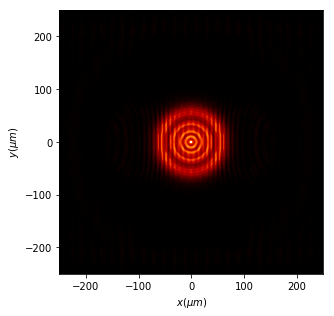

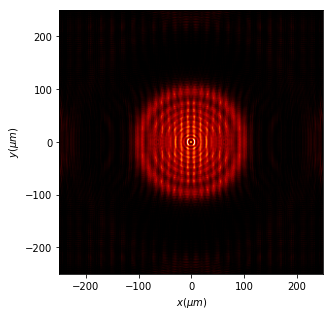

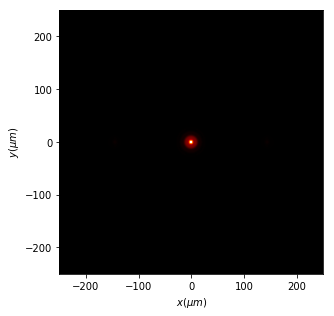

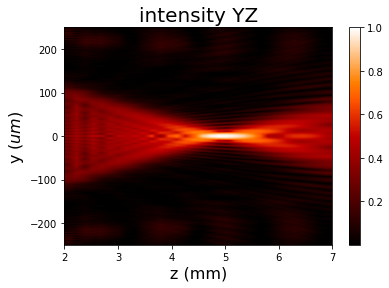

In [9]:
length = 500 * um
x0 = np.linspace(-length / 2, length / 2, 256)
y0 = np.linspace(-length / 2, length / 2, 256)
z0 = np.linspace(2 * mm, 7 * mm, 32)
wavelength = 0.6328 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(A=1, r0=(0, 0), z0=0, w0=(150 * um, 150 * um))

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.ronchi_grating(period=20 * um, x0=0 * um, angle=0 * degrees)
t2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t2.lens(
    r0=(0 * um, 0 * um),
    radius=(200 * um, 200 * um),
    focal=(5 * mm, 5 * mm),
    angle=0 * degrees)

t3 = u1 * t1 * t2

uxyz = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(t3)
uxyz.RS()

u_xy = uxyz.to_Scalar_field_XY(
    iz0=None, z0=3 * mm, is_class=True, matrix=False)
u_xy.draw(kind='intensity')

uxyz.draw_intensityXY(z0=2 * mm)
uxyz.draw_intensityXY(z0=4.5 * mm)
uxyz.draw_intensityXZ(y0=0 * mm, logarithm=True)

In [10]:
uxyz.draw_intensityXYZ(logarithm=False, normalize='maximum')

vea y cierre la ventana abierta para continuar


In [1]:
# uxyz.drawVolumen3D(logarithm=1, normalize='maximum', maxintensity=None)

### propagacion_RS_Talbot_video

/home/luismiguel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


time in RS= 2.9890494346618652. num proc= 4
vea y cierre la ventana abierta para continuar
0.00034119056738566195 2.865631289263524
0 de 64: z=0.8, max= 0.87 min=0.01
1 de 64: z=0.8253968253968255, max= 1.00 min=0.01
2 de 64: z=0.8507936507936509, max= 0.91 min=0.00
3 de 64: z=0.8761904761904762, max= 0.77 min=0.03
4 de 64: z=0.9015873015873016, max= 0.99 min=0.00
5 de 64: z=0.926984126984127, max= 0.93 min=0.00
6 de 64: z=0.9523809523809524, max= 0.87 min=0.01
7 de 64: z=0.9777777777777779, max= 0.88 min=0.01
8 de 64: z=1.0031746031746032, max= 0.96 min=0.00
9 de 64: z=1.0285714285714285, max= 0.90 min=0.01
10 de 64: z=1.053968253968254, max= 0.78 min=0.02
11 de 64: z=1.0793650793650793, max= 0.87 min=0.00
12 de 64: z=1.1047619047619048, max= 0.83 min=0.00
13 de 64: z=1.1301587301587301, max= 0.74 min=0.07
14 de 64: z=1.1555555555555557, max= 0.73 min=0.02
15 de 64: z=1.180952380952381, max= 0.72 min=0.00
16 de 64: z=1.2063492063492063, max= 0.73 min=0.01
17 de 64: z=1.231746031746031

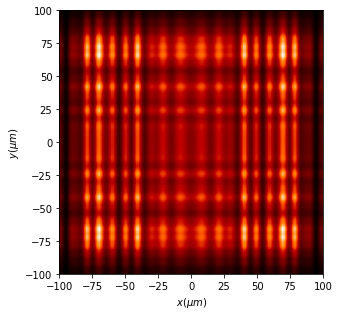

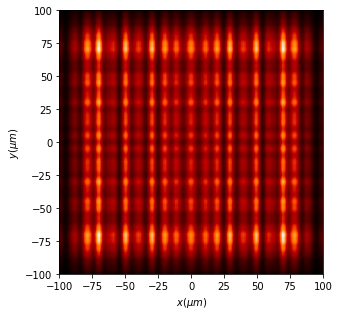

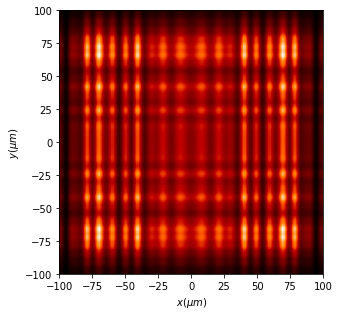

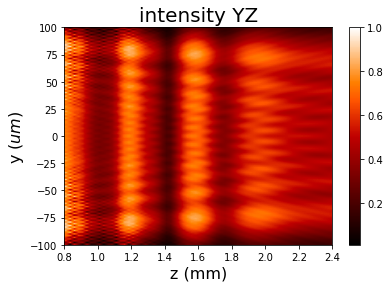

In [4]:
length = 200 * um
numdata = 128
x0 = np.linspace(-length / 2, length / 2, numdata)
y0 = np.linspace(-length / 2, length / 2, numdata)
wavelength = 0.5 * um

filename='RS_talbot_video'

period = 10 * um
z_talbot = 2 * period**2 / wavelength

z0 = np.linspace(2 * z_talbot, 6 * z_talbot, numdata / 4)

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(A=1, r0=(0, 0), z0=0, w0=(150 * um, 150 * um))
u1.plane_wave(A=1, theta=0 * degrees, phi=0 * degrees)

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.ronchi_grating(period=10 * um, x0=0 * um, angle=0 * degrees)
t3 = u1 * t1

uxyz = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(t3)
uxyz.RS()

uScalar_field_XY = uxyz.to_Scalar_field_XY(z0=3 * mm)
uScalar_field_XY.draw(kind='intensity', cut_value=None)

uxyz.draw_intensityXY(z0=2 * mm)
uxyz.draw_intensityXY(z0=4.5 * mm)
uxyz.draw_intensityXZ(y0=0 * mm, logarithm=True)
uxyz.draw_intensityXYZ(logarithm=False, normalize='maximum')
# uxyz.drawVolumen3D(logarithm=1, normalize='maximum', maxintensity=None)

uxyz.video(filename=filename + '.html', kind='intensity', frame=False)

### BPM
"""
cylinder torcido que hace de lente en una direccion solo
"""

close the window to continue
vea y cierre la ventana abierta para continuar
vea y cierre la ventana abierta para continuar


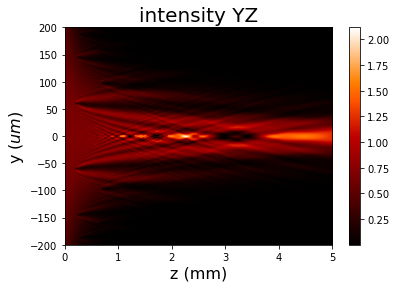

In [5]:

x0 = np.linspace(-200*um, 200*um, 256)
y0 = np.linspace(-200*um, 200*um, 256)
z0 = np.linspace(0, 5*mm, 128)

wavelength = 0.55 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(
    A=1,
    r0=(0 * um, 0 * um),
    w0=(500*um, 500*um),
    theta=0. * degrees,
    phi=0 * degrees)


uxyz = Scalar_mask_XYZ(
    x=x0, y=y0, z=z0, wavelength=wavelength, n_background=1., info='')
uxyz.incident_field(u1)
uxyz.sphere(
     r0=(0 * um, 0 * um, 400*um),
     radius=(250*um, 250*um, 250*um),
     refraction_index=4,
     angles=0)

uxyz.BPM()

uxyz.draw_refraction_index3D()

uxyz.draw_intensityXYZ(logarithm=True, normalize='maximum')
uxyz.draw_intensityXZ(
    y0=0.01, logarithm=True, normalize='false', draw_borders=False)

# uxyz.drawVolumen3D(logarithm=True, normalize='maximum')

### video

In [3]:
length = 80 * um
numdataX = 128
numdataZ = 16
longitud = 50 * um
radiusFibra = 10 * um
x0 = np.linspace(-length / 2, length / 2, numdataX)
y0 = np.linspace(-length / 2, length / 2, numdataX)
z0 = np.linspace(0, longitud, numdataZ)
wavelength = 2 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
# u1.gauss_beam(
#     A=1,
#     r0=(0 * um, 0 * um),
#     w0=(.5 * radiusFibra, .5 * radiusFibra),
#     theta=0. * degrees,
#     phi=0 * degrees)
u1.plane_wave()

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(
    r0=(0 * um, 0 * um),
    radius=(4 * radiusFibra, 2 * radiusFibra),
    angle=45 * degrees)
u2 = u1 * t1

uxyz = Scalar_mask_XYZ(
    x=x0, y=y0, z=z0, wavelength=wavelength, n_background=1., info='')
uxyz.incident_field(u2)

uxyz.BPM()

uxyz.video(
    filename='test_video.html',
    kind='intensity',
    frame=False)

1.9012157972495105e-05 1.7574417449651523
0 de 16: z=0.0, max= 1.00 min=0.22
1 de 16: z=0.0033333333333333335, max= 0.98 min=0.19
2 de 16: z=0.006666666666666667, max= 0.97 min=0.13
3 de 16: z=0.01, max= 0.96 min=0.10
4 de 16: z=0.013333333333333334, max= 0.99 min=0.06
5 de 16: z=0.016666666666666666, max= 0.99 min=0.04
6 de 16: z=0.02, max= 0.97 min=0.02
7 de 16: z=0.023333333333333334, max= 0.99 min=0.01
8 de 16: z=0.02666666666666667, max= 0.98 min=0.01
9 de 16: z=0.03, max= 0.99 min=0.01
10 de 16: z=0.03333333333333333, max= 0.98 min=0.00
11 de 16: z=0.036666666666666674, max= 1.00 min=0.00
12 de 16: z=0.04, max= 0.97 min=0.00
13 de 16: z=0.043333333333333335, max= 0.96 min=0.00
14 de 16: z=0.04666666666666667, max= 1.00 min=0.00
15 de 16: z=0.05, max= 1.00 min=0.00


### xz_2_xyz

AttributeError: 'list' object has no attribute 'x'

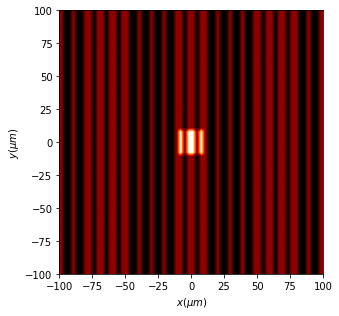

In [5]:
length = 200 * um
numdata = 64
x0 = np.linspace(-length / 2, length / 2, numdata)
y0 = np.linspace(-length / 2, length / 2, numdata)
z0 = np.linspace(.1 * mm, .2 * mm, 64)
wavelength = 0.6328 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.plane_wave()
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.square(
    r0=(0 * um, 0 * um), size=(20 * um, 20 * um), angle=0 * degrees)
t2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t2.ronchi_grating(period=10 * um, x0=20 * um, angle=0 * degrees)

u2 = u1 * t1 * t2
u2.draw()
scalar_field_XY = []
for i in range(len(z0)):
    u3 = u2.RS(z=z0[i], new_field=True)
    scalar_field_XY.append(u3)

z0p = np.linspace(1 * mm, 7 * mm, numdata)
uxyz = Scalar_field_XYZ(x=x0, y=y0, z=z0p, wavelength=wavelength)
uxyz.incident_field(u2)
uxyz.xz_2_xyz(scalar_field_XY, z0)

# uxyz.drawVolumen3D()
uxyz.video('test_xz_2_xyz.html', kind='intensity',   frame=True)

### cut_function

In [6]:
length = 50 * um
numdataX = 256
numdataZ = 128
longitud = 512 * um
radiusFibra = 25 * um
x0 = np.linspace(-length, length, numdataX)
y0 = np.linspace(-length, length, numdataX)
z0 = np.linspace(0, longitud, numdataZ)
wavelength = 0.55 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.plane_wave()
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(
    r0=(0 * um, 0 * um),
    radius=(radiusFibra, radiusFibra),
    angle=0 * degrees)
u2 = u1 * t1

uxyz = Scalar_mask_XYZ(
    x=x0, y=y0, z=z0, wavelength=wavelength, n_background=1., info='')
uxyz.incident_field(u2)
uxyz.sphere(
    r0=(0 * um, 0 * um, radiusFibra),
    radius=(radiusFibra, radiusFibra, radiusFibra),
    refraction_index=2,
    angles=(0, 0, 0))

# uxyz.draw_refraction_index3D()
uxyz.draw_intensityXYZ()
uxyz2 = uxyz.cut_function(
    xmin=-25 * um,
    xmax=25 * um,
    ymin=-25 * um,
    ymax=25 * um,
    zmin=0 * um,
    zmax=50 * um,
    new_field=True)
uxyz2.draw_intensityXYZ()
# uxyz2.draw_refraction_index3D()


/home/luismiguel/bitbucket/diffractio/diffractio/scalar_fields_XYZ.py:1149: RuntimeWarning: invalid value encountered in true_divide
  drawing = drawing / drawing.max()
/home/luismiguel/.local/lib/python3.6/site-packages/mayavi/core/module_manager.py:55: RuntimeWarning: All-NaN slice encountered
  self.range = [float(numpy.nanmin(data_array)),
/home/luismiguel/.local/lib/python3.6/site-packages/mayavi/core/module_manager.py:56: RuntimeWarning: All-NaN slice encountered
  float(numpy.nanmax(data_array))]


vea y cierre la ventana abierta para continuar


AttributeError: 'Scalar_mask_XYZ' object has no attribute 'cut_function'

### benchmark_RS_multiprocessing

In [2]:
x0 = np.linspace(-25 * um, 25 * um, 128)
y0 = np.linspace(-25 * um, 25 * um, 128)
z0 = np.linspace(100 * um, 500 * um, 64)
wavelength = 0.55 * um

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(
    r0=(0 * um, 0 * um), radius=(20 * um, 20 * um), angle=0 * degrees)

uxyz = Scalar_mask_XYZ(
    x=x0, y=y0, z=z0, wavelength=wavelength, n_background=1., info='')
uxyz.incident_field(t1)
uxyz.sphere(
    r0=(0 * um, 0 * um, 0 * um),
    radius=(10 * um, 30 * um, 50 * um),
    refraction_index=2,
    angles=(0 * degrees, 0 * degrees, 45 * degrees))
uxyz.u0 = t1

nums_processors = (1, 4, 8)
for num_processors in nums_processors:
    time = uxyz.RS(num_processors=num_processors, verbose=False)
    print("time in RS_multiprocessing {}: {} seconds".format(num_processors, time))
    

time in RS= 1.351759433746338. num proc= 1
time in RS_multiprocessing 1: 1.351759433746338 seconds
time in RS= 2.996224880218506. num proc= 4
time in RS_multiprocessing 4: 2.996224880218506 seconds
time in RS= 5.860253572463989. num proc= 8
time in RS_multiprocessing 8: 5.860253572463989 seconds


In [3]:
uxyz.draw_intensityXYZ(
    kind='intensity', logarithm=False, normalize='maximum', draw=True)

vea y cierre la ventana abierta para continuar
